## Students' Academic Performance 

## Weekend Project 8 


*Team Members:*
- Ruba Alkhattabi
- Amani Almarzoog
- Abdullah Alothman
- Razan Alsallumi


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
# Load  dataset
PATH = "./xAPI-Edu-Data.csv"

df = pd.read_csv(PATH) 
df.sample()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
364,M,Iraq,Iraq,lowerlevel,G-02,A,Arabic,F,Father,80,95,21,28,Yes,Good,Under-7,H


In [7]:
# Change Class column from L M H latters To lower_level, Middle_School, and High_School
df['Class'] = df['Class'].replace(['L'],'lower_level') 
df['Class'] = df['Class'].replace(['M'],'Middle_School')
df['Class'] = df['Class'].replace(['H'],'High_School')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Middle_School
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Middle_School
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,lower_level
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,lower_level
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Middle_School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,lower_level
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,Middle_School
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,Middle_School
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,lower_level


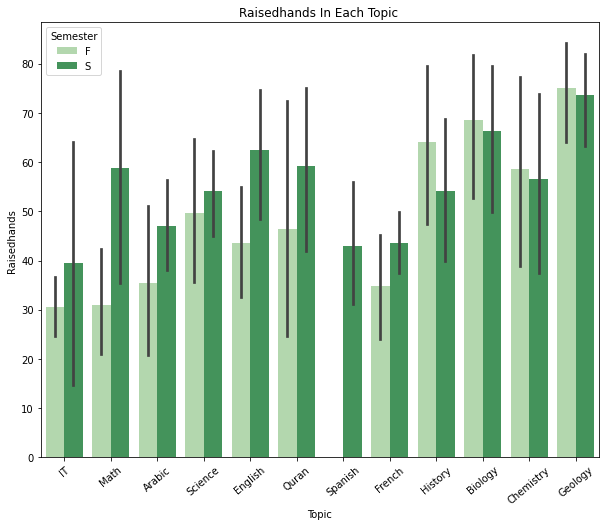

In [8]:
# 1st Plot: Bar Plot
plt.figure(figsize=(10,8))
g= sns.barplot(x="Topic",
            y="raisedhands",
            palette="Greens",
            hue="Semester",
            data=df
           )

g.set_xticklabels(g.get_xticklabels(), rotation=40) # To rotate topic varibles in x-axis

plt.xlabel("Topic") # add x axis label
plt.ylabel("Raisedhands") # add y axis label
plt.title("Raisedhands In Each Topic ") 

#plt.savefig('bar2_plot.png') # Save figure
plt.show()

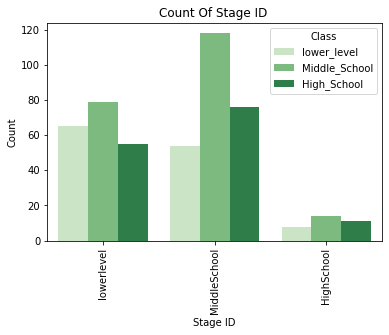

In [9]:
#2nd Plot bars Plot Using countplot() 

sns.countplot(x='StageID',
              hue='Class', 
              data=df, 
              palette="Greens",
              hue_order = ['lower_level', 'Middle_School', 'High_School'] 
             )

plt.xticks(plt.xticks()[0], rotation=90)

plt.xlabel("Stage ID") # add x axis label
plt.ylabel("Count")  # add y axis label
plt.title("Count Of Stage ID ")

#plt.savefig('bar_plot.png') # Save figure
plt.show()

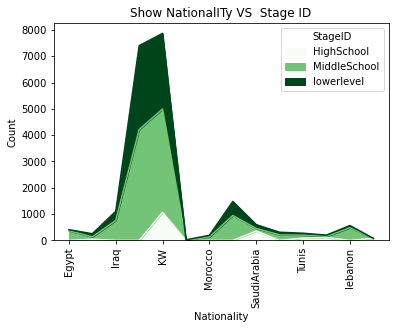

In [10]:
#3ed Plot 
#Total Discussion over Nationality in each StageID
df\
.groupby(["NationalITy", "StageID"])["Discussion"]\
.sum()\
.unstack("StageID")\
.plot(kind="area",
      stacked=True, 
      rot=90, 
      colormap="Greens"
      )


plt.xlabel("Nationality") # add x axis label
plt.ylabel("Count")  # add y axis label
plt.title("Show NationalITy VS  Stage ID")

#plt.savefig('area_plot.png') # Save figure

plt.show();

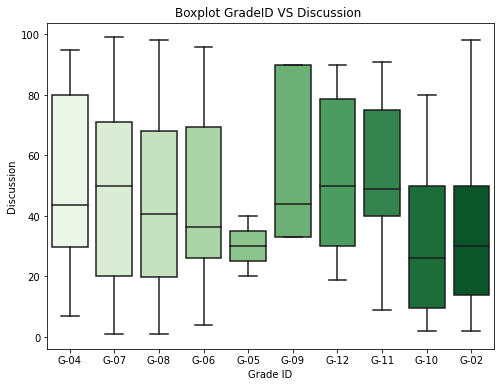

In [11]:
# 4th Plot: Boxplot 

plt.figure(figsize=(8,6))
sns.boxplot(data=df,
             x="GradeID",
             y="Discussion",
             palette="Greens",
            )

plt.xlabel("Grade ID") # add x axis label
plt.ylabel("Discussion")  # add y axis label
plt.title("Boxplot GradeID VS Discussion ")


#plt.savefig('box_plot.png') # Save figure
plt.show()

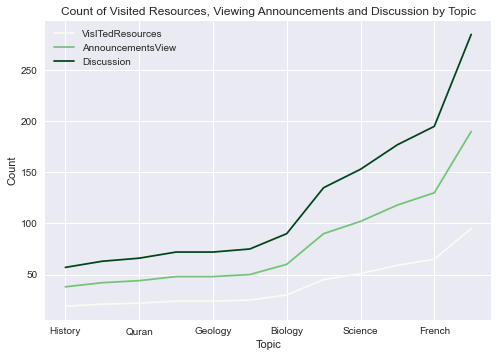

In [12]:
# 5th Plot: line plot

plt.style.use("seaborn")
df3 = pd.DataFrame(df.groupby(['Topic']).count()[["VisITedResources","AnnouncementsView","Discussion"]]).sort_values(by='VisITedResources')
df3.plot(kind="line",
         stacked=True ,
         colormap="Greens",
         ylabel= 'Count',
         title="Count of Visited Resources, Viewing Announcements and Discussion by Topic"  
        )


#plt.savefig('line_plot.png') # Save figure
plt.show()

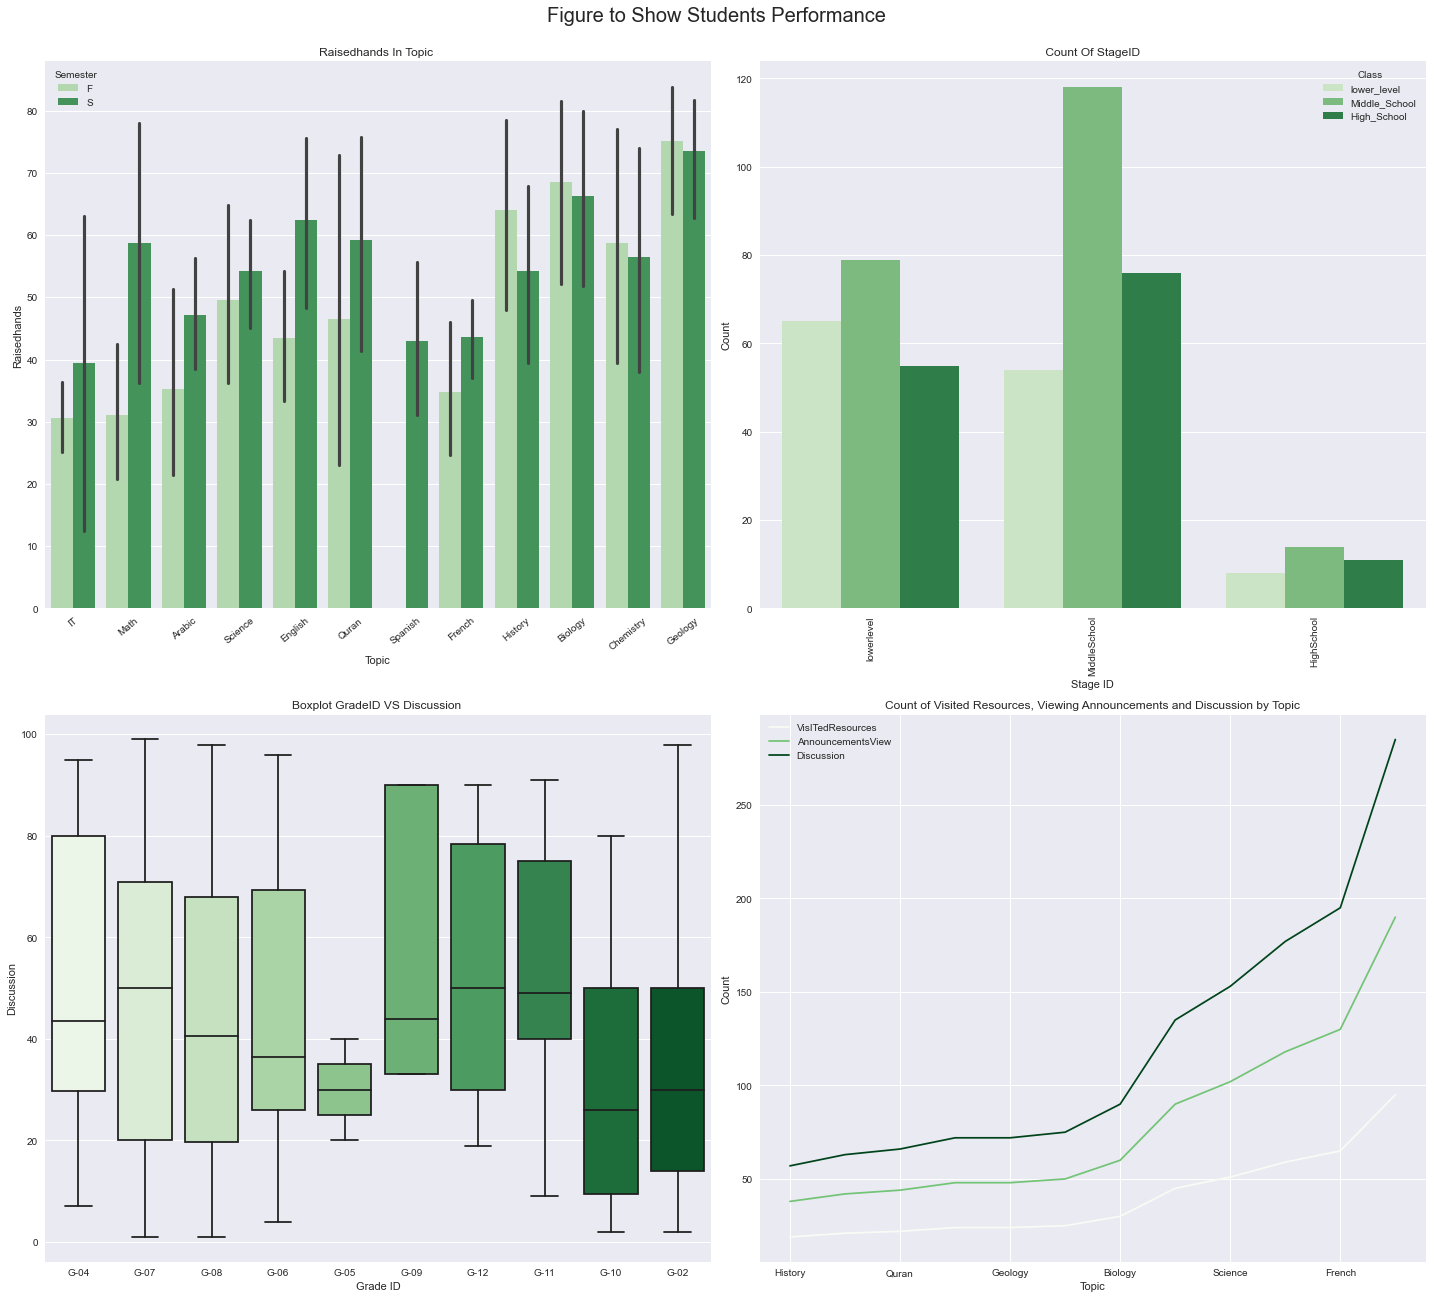

In [13]:
# subplot with 4 plots 

fig, ax = plt.subplots(2,2, figsize=(20,18))
plt.suptitle('Figure to Show Medical Cost Personal')
plt.suptitle('Figure to Show Students Performance'  , y= 1 , fontsize = 20)


#Plot 1


plt.subplot(2,2,1)
g= sns.barplot(x="Topic",
            y="raisedhands",
            palette="Greens",
            hue="Semester",
            data=df
           )
g.set_xticklabels(g.get_xticklabels(), rotation=40) # To rotate topic varibles in x-axis

plt.xlabel("Topic") # add x axis label
plt.ylabel("Raisedhands")  # add y axis label
plt.title("Raisedhands In Topic ")


#Plot 2
plt.subplot(2,2,2)
sns.countplot(x='StageID',
              hue='Class', 
              data=df,
              palette="Greens",
              hue_order = ['lower_level', 'Middle_School', 'High_School'] 
             )

plt.xticks(plt.xticks()[0], rotation=90)
plt.xlabel("Stage ID") # add x axis label
plt.ylabel("Count")  # add y axis label
plt.title(" Count Of StageID ")

#Plot 3:
plt.subplot(2,2,3)
sns.boxplot(data=df,
             x="GradeID",
             y="Discussion",
             palette="Greens",
            )


plt.xlabel("Grade ID") # add x axis label
plt.ylabel("Discussion")  # add y axis label
plt.title("Boxplot GradeID VS Discussion ")

#Plot 4
#plt.subplot(2,2,4)
plt.style.use("seaborn")
df3 = pd.DataFrame(df.groupby(['Topic']).count()[["VisITedResources","AnnouncementsView","Discussion"]]).sort_values(by='VisITedResources')
df3.plot(kind="line",
         stacked=True ,
         colormap="Greens",
         ax=ax[1,1],
         ylabel= 'Count',
         title="Count of Visited Resources, Viewing Announcements and Discussion by Topic"  
        )



plt.tight_layout()
#plt.savefig('EDU_plots.png') # Save figure
plt.show()

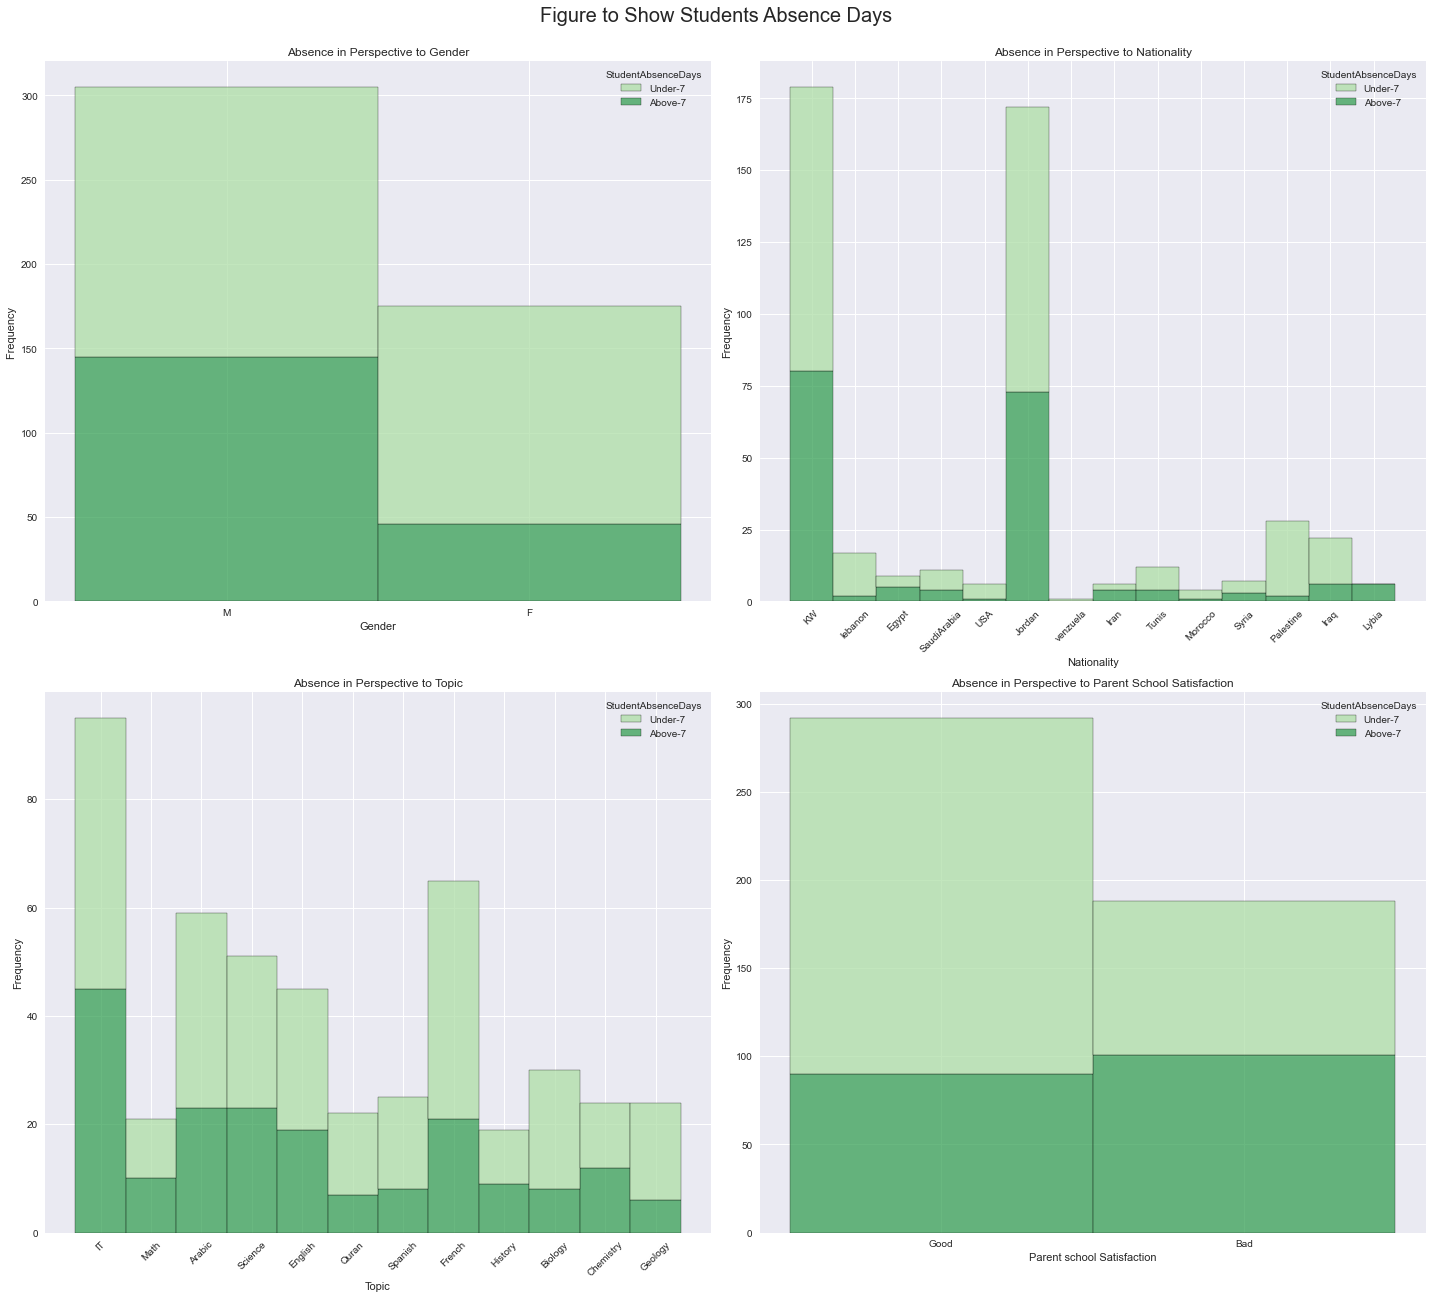

In [14]:
# subplot with 4 plots 

plt.figure(figsize=(20,18))
plt.suptitle('Figure to Show Students Absence Days' , y= 1 , fontsize = 20)

#Plot 1:
plt.subplot(2,2,1)
sns.histplot(
    df,
    hue="StudentAbsenceDays",
    x="gender",
    multiple="stack",
    palette="Greens"
    )

plt.xlabel("Gender") # add x axis label
plt.ylabel("Frequency ")  # add y axis label
plt.title("Absence in Perspective to Gender")


#Plot 2:
plt.subplot(2,2,2)
sns.histplot(
    df,
    hue="StudentAbsenceDays",
    x="NationalITy",
    multiple="stack",
    palette="Greens"
    )
plt.xticks(rotation=45)

plt.xlabel("Nationality") # add x axis label
plt.ylabel("Frequency") # add y axis label
plt.title("Absence in Perspective to Nationality")


#Plot 3:
plt.subplot(2,2,3)
sns.histplot(
    df,
    hue="StudentAbsenceDays",
    x="Topic",
    multiple="stack",
    palette="Greens"
    )
plt.xticks(rotation=45)

plt.xlabel("Topic") # add x axis label
plt.ylabel("Frequency")  # add y axis label
plt.title("Absence in Perspective to Topic")

#Plot 4:
plt.subplot(2,2,4)
sns.histplot(
    df,
    hue="StudentAbsenceDays",
    x="ParentschoolSatisfaction",
    multiple="stack",
    palette="Greens"
   )

plt.xlabel(" Parent school Satisfaction ") # add x axis label
plt.ylabel("Frequency")  # add y axis label
plt.title("Absence in Perspective to Parent School Satisfaction")

plt.tight_layout()
#plt.savefig('StudentAbsenceDays.png') # Save figure

plt.show()